{'A': 0.005*x + 0.06,
 'I_y': poly1d([2.60416666666667e-7, 9.37500000000001e-6, 0.000112500000000000,
       0.000450000000000000], dtype=object),
 'I_z': poly1d([1.66666666666667e-5, 0.000200000000000000], dtype=object),
 'b_render': 0.2,
 'eta_y': array([1.00000000000000, 0.250000000000000, 0.0208333333333334,
       0.000578703703703704], dtype=object),
 'eta_z': array([1.00000000000000, 0.0833333333333334], dtype=object),
 'h_render': 0.025*x + 0.3,
 'y_s': 0.1,
 'z_s': 0.0125*x + 0.15}
I_y(0) =  0.000450000000000000
I_y(l) =  0.00106666666666667


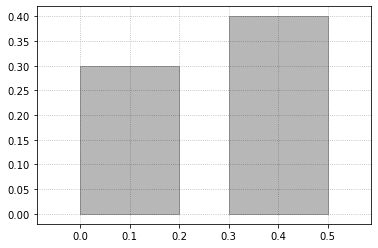

AttributeError: 'Line2D' object has no property 'scale'

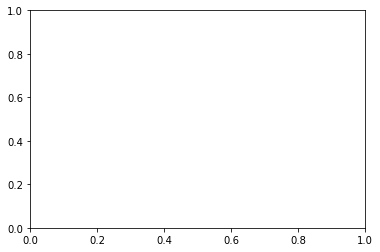

In [9]:
import sympy as sym
import matplotlib.pyplot as plt
import stanpy as stp

x = sym.Symbol("x")
l = 4  # m
E = 2.1e8
b, ha, hb = 0.2, 0.3, 0.4  # m
hx = ha + (hb - ha) / l * x  # m
cs = stp.cs(b=b, h=hx)

s = {"E": E, "cs": cs, "q": 10, "l": l, "bc_i": {"w": 0, "M": 0, "H": 0}, "bc_k": {"w": 0, "phi": 0}}

print(cs)
print("I_y(0) = ", cs["I_y"](0))
print("I_y(l) = ", cs["I_y"](l))

offset = 0.2
fig, ax = plt.subplots()
stp.plot_cs(ax, b, hx.subs(x, 0))
stp.plot_cs(ax, b, hx.subs(x, l), dy=0.3)

ax.set_xlim(-offset, b + offset)
ax.set_ylim(-offset, float(hx.subs(x, l)) + offset)
ax.grid(linestyle=":")
ax.axis('equal')

plt.show()

fig, ax = plt.subplots()
stp.plot_system(ax, s, render=True, facecolor="gray", alpha=0.5, render_scale=0.2)
ax.grid(linestyle=":")
ax.axis('equal')

plt.show()